## Word2Vec

In [1]:
import sys
sys.path.append('/home/romain/Documents/Personal/Projects/Soundtrack_ML/soundtrack-ml')

import yaml
import pandas as pd

from smart_shuffle.embeddings.ml_emb.track_playlist_emb.data_transform import DataTransformer

In [2]:
# Load configuration from YAML file
with open('/home/romain/Documents/Personal/Projects/Soundtrack_ML/soundtrack-ml/smart_shuffle/embeddings/ml_emb/track_playlist_emb/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

# Get paths from config
RAW_DATA_PATH = config['data']['raw_data_path']
PROCESSED_DATA_PATH = config['data']['processed_data_path']
# Get paths from config
DATA_PATH = config['data']['ml_train_data_path']
MODEL_SAVE_PATH = config['data']['model_save_path']

### Prepare sentences to train w2v model

In [3]:
# Initialize transformer
transformer = DataTransformer(RAW_DATA_PATH, PROCESSED_DATA_PATH)

# Process data (start with 10 files for testing)
stats = transformer.process_all_data(max_files=config['data_transform']['max_files'])

if stats:
    print("\nVocabulary Statistics Summary:")
    for sentence_type, stats_data in stats.items():
        print(f"\n{sentence_type}:")
        print(f"  Total sentences: {stats_data['total_sentences']}")
        print(f"  Unique tokens: {stats_data['unique_tokens']}")
        print(f"  Average sentence length: {stats_data['avg_sentence_length']:.2f}")
        print(f"  Most common tokens: {[token for token, count in stats_data['most_common_tokens'][:5]]}")

Starting data transformation pipeline...
Loading 100 JSON files...
Processing file 1/100: mpd.slice.61000-61999.json
Processing file 11/100: mpd.slice.329000-329999.json
Processing file 21/100: mpd.slice.481000-481999.json
Processing file 31/100: mpd.slice.876000-876999.json
Processing file 41/100: mpd.slice.919000-919999.json
Processing file 51/100: mpd.slice.132000-132999.json
Processing file 61/100: mpd.slice.273000-273999.json
Processing file 71/100: mpd.slice.796000-796999.json
Processing file 81/100: mpd.slice.817000-817999.json


KeyboardInterrupt: 

### Training w2v model

In [4]:
from smart_shuffle.embeddings.ml_emb.track_playlist_emb.train_w2v import Word2VecTrainer

# Initialize trainer
trainer = Word2VecTrainer(DATA_PATH, MODEL_SAVE_PATH)

print("Preprocessing text data...")
sentences = trainer.load_sentences()

if len(sentences) < 100:
    print(f"Warning: Only {len(sentences)} sentences found. Consider using more data.")

# Train model
print("Training Word2Vec model...")
model = trainer.train_model(
    sentences=sentences,
    vector_size=256,
    window=10,
    min_count=5,
    workers=4,
    epochs=10,
    sg=0  # CBOW
)

# Save model
print("Saving model...")
trainer.save_model(model, "spotify_w2v")

# Evaluate model
trainer.evaluate_model(model)

print("Training completed successfully!")

Preprocessing text data...


2025-10-29 22:49:11,979 : INFO : collecting all words and their counts
2025-10-29 22:49:11,979 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-10-29 22:49:12,113 : INFO : PROGRESS: at sentence #10000, processed 671260 words, keeping 170645 word types


Loaded 100000 sentences from pickle file
Training Word2Vec model...
Training Word2Vec model with 100000 sentences...
Parameters: vector_size=256, window=10, min_count=5


2025-10-29 22:49:12,306 : INFO : PROGRESS: at sentence #20000, processed 1327945 words, keeping 262512 word types
2025-10-29 22:49:12,499 : INFO : PROGRESS: at sentence #30000, processed 1982003 words, keeping 336219 word types
2025-10-29 22:49:12,707 : INFO : PROGRESS: at sentence #40000, processed 2639891 words, keeping 402060 word types
2025-10-29 22:49:12,906 : INFO : PROGRESS: at sentence #50000, processed 3293628 words, keeping 458987 word types
2025-10-29 22:49:13,100 : INFO : PROGRESS: at sentence #60000, processed 3953913 words, keeping 511482 word types
2025-10-29 22:49:13,306 : INFO : PROGRESS: at sentence #70000, processed 4621282 words, keeping 561646 word types
2025-10-29 22:49:13,504 : INFO : PROGRESS: at sentence #80000, processed 5290899 words, keeping 606505 word types
2025-10-29 22:49:13,706 : INFO : PROGRESS: at sentence #90000, processed 5946607 words, keeping 647836 word types
2025-10-29 22:49:13,911 : INFO : collected 687189 word types from a corpus of 6615091 ra

Epoch #0 end


2025-10-29 22:49:21,487 : INFO : EPOCH 1 - PROGRESS: at 17.47% examples, 1013401 words/s, in_qsize 6, out_qsize 1
2025-10-29 22:49:22,493 : INFO : EPOCH 1 - PROGRESS: at 35.84% examples, 1029681 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:23,498 : INFO : EPOCH 1 - PROGRESS: at 54.06% examples, 1032209 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:24,502 : INFO : EPOCH 1 - PROGRESS: at 71.71% examples, 1028629 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:25,506 : INFO : EPOCH 1 - PROGRESS: at 88.79% examples, 1020478 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:26,157 : INFO : EPOCH 1: training on 6615091 raw words (5782394 effective words) took 5.7s, 1018638 effective words/s


Epoch #1 end


2025-10-29 22:49:27,174 : INFO : EPOCH 2 - PROGRESS: at 16.58% examples, 955934 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:28,175 : INFO : EPOCH 2 - PROGRESS: at 33.70% examples, 968270 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:29,179 : INFO : EPOCH 2 - PROGRESS: at 51.02% examples, 974243 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:30,183 : INFO : EPOCH 2 - PROGRESS: at 67.54% examples, 967245 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:31,191 : INFO : EPOCH 2 - PROGRESS: at 83.98% examples, 963854 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:32,169 : INFO : EPOCH 2: training on 6615091 raw words (5782394 effective words) took 6.0s, 962220 effective words/s


Epoch #2 end


2025-10-29 22:49:33,188 : INFO : EPOCH 3 - PROGRESS: at 16.41% examples, 944992 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:34,198 : INFO : EPOCH 3 - PROGRESS: at 32.96% examples, 941779 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:35,212 : INFO : EPOCH 3 - PROGRESS: at 48.75% examples, 924186 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:36,216 : INFO : EPOCH 3 - PROGRESS: at 64.29% examples, 915532 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:37,219 : INFO : EPOCH 3 - PROGRESS: at 79.85% examples, 914188 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:38,230 : INFO : EPOCH 3 - PROGRESS: at 95.63% examples, 912260 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:38,487 : INFO : EPOCH 3: training on 6615091 raw words (5782394 effective words) took 6.3s, 915474 effective words/s


Epoch #3 end


2025-10-29 22:49:39,506 : INFO : EPOCH 4 - PROGRESS: at 14.86% examples, 859651 words/s, in_qsize 5, out_qsize 2
2025-10-29 22:49:40,526 : INFO : EPOCH 4 - PROGRESS: at 30.89% examples, 878332 words/s, in_qsize 6, out_qsize 1
2025-10-29 22:49:41,541 : INFO : EPOCH 4 - PROGRESS: at 46.59% examples, 881633 words/s, in_qsize 6, out_qsize 1
2025-10-29 22:49:42,542 : INFO : EPOCH 4 - PROGRESS: at 61.73% examples, 877878 words/s, in_qsize 6, out_qsize 0
2025-10-29 22:49:43,543 : INFO : EPOCH 4 - PROGRESS: at 76.42% examples, 873825 words/s, in_qsize 6, out_qsize 1
2025-10-29 22:49:44,551 : INFO : EPOCH 4 - PROGRESS: at 91.16% examples, 868989 words/s, in_qsize 7, out_qsize 1
2025-10-29 22:49:45,128 : INFO : EPOCH 4: training on 6615091 raw words (5782394 effective words) took 6.6s, 871115 effective words/s
2025-10-29 22:49:45,129 : INFO : Word2Vec lifecycle event {'msg': 'training on 33075455 raw words (28911970 effective words) took 29.8s, 969086 effective words/s', 'datetime': '2025-10-29T

Epoch #4 end


2025-10-29 22:49:46,137 : INFO : EPOCH 0 - PROGRESS: at 13.96% examples, 816500 words/s, in_qsize 8, out_qsize 1
2025-10-29 22:49:47,151 : INFO : EPOCH 0 - PROGRESS: at 29.36% examples, 841818 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:48,155 : INFO : EPOCH 0 - PROGRESS: at 44.50% examples, 849239 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:49,157 : INFO : EPOCH 0 - PROGRESS: at 59.35% examples, 849162 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:50,169 : INFO : EPOCH 0 - PROGRESS: at 74.11% examples, 848789 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:51,177 : INFO : EPOCH 0 - PROGRESS: at 89.54% examples, 855301 words/s, in_qsize 8, out_qsize 0
2025-10-29 22:49:51,910 : INFO : EPOCH 0: training on 6615091 raw words (5782394 effective words) took 6.8s, 852963 effective words/s
2025-10-29 22:49:52,916 : INFO : EPOCH 1 - PROGRESS: at 14.86% examples, 870847 words/s, in_qsize 7, out_qsize 0
2025-10-29 22:49:53,916 : INFO : EPOCH 1 - PROGRESS: at 29.80% examples, 86

Saving model...


2025-10-29 22:50:58,304 : INFO : saved /home/romain/Documents/Personal/Projects/Soundtrack_ML/soundtrack-ml/smart_shuffle/models/track_playlist/spotify_w2v.model


Model saved to: /home/romain/Documents/Personal/Projects/Soundtrack_ML/soundtrack-ml/smart_shuffle/models/track_playlist/spotify_w2v.model
Metadata saved to: /home/romain/Documents/Personal/Projects/Soundtrack_ML/soundtrack-ml/smart_shuffle/models/track_playlist/spotify_w2v_metadata.json

Model evaluation:
Vocabulary size: 133426
Vector dimensions: 256

Sample words and their vectors:
'humble._kendrick_lamar_damn.': [-1.6369997e-01  4.9679008e-01 -8.2470965e-01  3.4428101e+00
 -2.7814236e+00  1.3027996e+00  3.0370646e+00  1.4912256e+00
 -1.4370202e+00 -1.2336534e+00  5.0017983e-01 -3.9260787e-01
 -1.9327954e+00  4.8673830e+00 -2.3560181e+00 -1.2907290e+00
  1.7352071e+00 -1.5047209e+00 -5.8823019e-01 -1.1165129e+00
 -1.5029758e-01  1.4065533e+00 -7.5711232e-01 -6.7744368e-01
  4.7116509e-01 -4.7239482e-01 -2.3011074e+00 -1.7165907e-01
 -2.5051090e-01  8.0852598e-01  6.2360685e-02 -8.0934805e-01
 -8.0530030e-01 -1.9370620e-01 -1.3742962e+00 -1.8130391e+00
  1.7442544e-01 -8.8922423e-01 

In [16]:
# Exploring the results
# Load the trained model
from gensim.models import Word2Vec
import numpy as np

model_path = MODEL_SAVE_PATH + "/spotify_w2v.model"
model = Word2Vec.load(str(model_path))

print(f"Model loaded successfully!")
print(f"Vocabulary size: {len(model.wv)}")
print(f"Vector dimensions: {model.wv.vector_size}")

# Get some sample tracks to explore
sample_tracks = list(model.wv.index_to_key)[:20]
print(f"\nSample tracks in vocabulary:")
for i, track in enumerate(sample_tracks, 1):
    print(f"{i}. {track}")

# Test similarity for a few tracks
print("\n" + "="*80)
print("SIMILARITY EXPLORATION")
print("="*80)

test_tracks = sample_tracks[10:]
for track in test_tracks:
    if track in model.wv:
        print(f"\n🎵 Tracks similar to: '{track}'")
        similar = model.wv.most_similar(track, topn=10)
        for i, (similar_track, score) in enumerate(similar, 1):
            print(f"  {i}. {similar_track} (similarity: {score:.4f})")

# Explore vector properties
print("\n" + "="*80)
print("VECTOR PROPERTIES")
print("="*80)

# Get a sample vector
sample_track = sample_tracks[0]
sample_vector = model.wv[sample_track]
print(f"\nVector for '{sample_track}':")
print(f"  Shape: {sample_vector.shape}")
print(f"  Mean: {np.mean(sample_vector):.4f}")
print(f"  Std: {np.std(sample_vector):.4f}")
print(f"  Min: {np.min(sample_vector):.4f}")
print(f"  Max: {np.max(sample_vector):.4f}")
print(f"  First 10 dimensions: {sample_vector[:10]}")

# Compute some track relationships
print("\n" + "="*80)
print("TRACK RELATIONSHIPS")
print("="*80)

if len(sample_tracks) >= 3:
    track1, track2, track3 = sample_tracks[0], sample_tracks[1], sample_tracks[2]
    
    sim_12 = model.wv.similarity(track1, track2)
    sim_13 = model.wv.similarity(track1, track3)
    sim_23 = model.wv.similarity(track2, track3)
    
    print(f"\nPairwise similarities:")
    print(f"  '{track1}' <-> '{track2}': {sim_12:.4f}")
    print(f"  '{track1}' <-> '{track3}': {sim_13:.4f}")
    print(f"  '{track2}' <-> '{track3}': {sim_23:.4f}")

# Get all vectors for further analysis
print("\n" + "="*80)
print("PREPARING DATA FOR VISUALIZATION")
print("="*80)

all_vectors = np.array([model.wv[word] for word in model.wv.index_to_key])
all_tracks = model.wv.index_to_key

print(f"\nExtracted {all_vectors.shape[0]} vectors of dimension {all_vectors.shape[1]}")
print(f"Ready for dimensionality reduction and clustering!")



2025-10-30 09:39:17,504 : INFO : loading Word2Vec object from /home/romain/Documents/Personal/Projects/Soundtrack_ML/soundtrack-ml/smart_shuffle/models/track_playlist/spotify_w2v.model
2025-10-30 09:39:17,532 : INFO : loading wv recursively from /home/romain/Documents/Personal/Projects/Soundtrack_ML/soundtrack-ml/smart_shuffle/models/track_playlist/spotify_w2v.model.wv.* with mmap=None
2025-10-30 09:39:17,533 : INFO : loading vectors from /home/romain/Documents/Personal/Projects/Soundtrack_ML/soundtrack-ml/smart_shuffle/models/track_playlist/spotify_w2v.model.wv.vectors.npy with mmap=None
2025-10-30 09:39:17,560 : INFO : loading syn1neg from /home/romain/Documents/Personal/Projects/Soundtrack_ML/soundtrack-ml/smart_shuffle/models/track_playlist/spotify_w2v.model.syn1neg.npy with mmap=None
2025-10-30 09:39:17,586 : INFO : setting ignored attribute cum_table to None
2025-10-30 09:39:18,055 : INFO : Word2Vec lifecycle event {'fname': '/home/romain/Documents/Personal/Projects/Soundtrack_ML

Model loaded successfully!
Vocabulary size: 133426
Vector dimensions: 256

Sample tracks in vocabulary:
1. humble._kendrick_lamar_damn.
2. one_dance_drake_views
3. broccoli_(feat._lil_yachty)_dram_big_baby_dram
4. closer_the_chainsmokers_closer
5. congratulations_post_malone_stoney
6. ispy_(feat._lil_yachty)_kyle_ispy_(feat._lil_yachty)
7. caroline_aminé_good_for_you
8. xo_tour_llif3_lil_uzi_vert_luv_is_rage_2
9. bad_and_boujee_(feat._lil_uzi_vert)_migos_culture
10. location_khalid_american_teen
11. bounce_back_big_sean_i_decided.
12. no_role_modelz_j._cole_2014_forest_hills_drive
13. ignition_-_remix_r._kelly_chocolate_factory
14. i'm_the_one_dj_khaled_grateful
15. no_problem_(feat._lil_wayne_&_2_chainz)_chance_the_rapper_coloring_book
16. mask_off_future_future
17. fake_love_drake_more_life
18. goosebumps_travis_scott_birds_in_the_trap_sing_mcknight
19. gold_digger_kanye_west_late_registration
20. jumpman_drake_what_a_time_to_be_alive

SIMILARITY EXPLORATION

🎵 Tracks similar to: 'bo

## DBScan

In [17]:
tracks_data = pd.read_csv(PROCESSED_DATA_PATH + "/tracks_data.csv")
tracks_data.shape

(6615091, 7)

In [28]:
tracks_data = pd.read_csv(PROCESSED_DATA_PATH + "/tracks_data.csv")
tracks_data[tracks_data['artist_name'].str.contains('Hans Zimmer', case=False, na=False)]

,playlist_id,playlist_name,track_name,artist_name,album_name,duration_ms,pos
1983,61037,In the Zone,Lost but Won,Hans Zimmer,Rush,376520,2
2001,61037,In the Zone,Honor Him,Hans Zimmer,Gladiator - Music From The Motion Picture,79840,20
2002,61037,In the Zone,Time,Hans Zimmer,Inception,275546,21
2006,61037,In the Zone,This Land,Hans Zimmer,The Lion King,175400,25
15876,61232,Movie music,"Drink Up Me Hearties Yo Ho - From ""Pirates of ...",Hans Zimmer,"Pirates Of The Caribbean, At The World's End",271866,1
...,...,...,...,...,...,...,...
6585171,342548,study,Solomon,Hans Zimmer,12 Years A Slave (Music From and Inspired by t...,211133,53
6586876,342579,collab,S.T.A.Y.,Hans Zimmer,Interstellar: Original Motion Picture Soundtra...,383513,50
6596086,342715,Study,Time,Hans Zimmer,Inception,275546,2
6596087,342715,Study,Contingency,Hans Zimmer,Call of Duty: Modern Warfare 2,135626,3


In [18]:
tracks_data = pd.read_csv(PROCESSED_DATA_PATH + "/tracks_data.csv")
tracks_data[tracks_data['playlist_id'] == 61000]

,playlist_id,playlist_name,track_name,artist_name,album_name,duration_ms,pos
0,61000,glow,Money Longer,Lil Uzi Vert,Lil Uzi Vert Vs. The World,198944,0
1,61000,glow,Broccoli (feat. Lil Yachty),DRAM,Big Baby DRAM,225205,1
2,61000,glow,Still Here,Drake,Views,189853,2
3,61000,glow,You Was Right,Lil Uzi Vert,Lil Uzi Vert Vs. The World,163944,3
4,61000,glow,Don't Hurt Me,DJ Mustard,Don't Hurt Me,192995,4
...,...,...,...,...,...,...,...
117,61000,glow,Me You,Russ,There's Really A Wolf,164200,117
118,61000,glow,4 Lit,B.o.B,Ether,203755,118
119,61000,glow,Rake It Up,Yo Gotti,I Still Am,276333,119
120,61000,glow,Sorry Not Sorry,Demi Lovato,Tell Me You Love Me,203760,120


In [19]:
def create_track_token(track_name, artist_name, album_name):
    """Create the same token format used in Word2Vec training"""
    def tokenize_text(text):
        if not isinstance(text, str):
            return []
        return text.lower().split()
    
    token_parts = []
    
    if isinstance(track_name, str) and track_name.strip():
        track_tokens = tokenize_text(track_name)
        token_parts.extend(track_tokens)
    
    if isinstance(artist_name, str) and artist_name.strip():
        artist_tokens = tokenize_text(artist_name)
        token_parts.extend(artist_tokens)
    
    if isinstance(album_name, str) and album_name.strip():
        album_tokens = tokenize_text(album_name)
        token_parts.extend(album_tokens)
    
    return '_'.join(token_parts) if token_parts else None

# Filter vectors for playlist 61000
playlist_id = 61000
playlist_tracks = tracks_data[tracks_data['playlist_id'] == playlist_id]

if playlist_tracks.empty:
    print(f"No tracks found for playlist {playlist_id}")

print(f"Found {len(playlist_tracks)} tracks in playlist {playlist_id}")

# Create tokens and find matching vectors
playlist_vectors = []
playlist_track_names = []
found_tokens = []

for idx, row in playlist_tracks.iterrows():
    track_name = row['track_name']
    artist_name = row['artist_name'] 
    album_name = row['album_name']
    
    # Create the token as it would appear in the Word2Vec model
    token = create_track_token(track_name, artist_name, album_name)
    
    if token and token in model.wv:
        vector = model.wv[token]
        playlist_vectors.append(vector)
        playlist_track_names.append(f"{track_name} - {artist_name}")
        found_tokens.append(token)
        print(f"✓ Found vector for: {track_name} - {artist_name}")
    else:
        print(f"✗ No vector found for: {track_name} - {artist_name} (token: {token})")

if playlist_vectors:
    playlist_vectors = np.array(playlist_vectors)
    print(f"\nSuccessfully retrieved {len(playlist_vectors)} vectors of dimension {playlist_vectors.shape[1]}")

else:
    print(f"No vectors found for any tracks in playlist {playlist_id}")


print(playlist_vectors.shape)

Found 122 tracks in playlist 61000
✓ Found vector for: Money Longer - Lil Uzi Vert
✓ Found vector for: Broccoli (feat. Lil Yachty) - DRAM
✓ Found vector for: Still Here - Drake
✓ Found vector for: You Was Right - Lil Uzi Vert
✓ Found vector for: Don't Hurt Me - DJ Mustard
✓ Found vector for: No Problem (feat. Lil Wayne & 2 Chainz) - Chance The Rapper
✓ Found vector for: Seven Million (feat. Future) - Lil Uzi Vert
✓ Found vector for: Intoxicated - Ashley DuBose
✓ Found vector for: Caroline - Aminé
✓ Found vector for: OTW - DJ Luke Nasty
✓ Found vector for: iSpy (feat. Lil Yachty) - KYLE
✓ Found vector for: One Night - Lil Yachty
✓ Found vector for: Bounce Back - Big Sean
✓ Found vector for: Shape of You - Ed Sheeran
✓ Found vector for: So Good - Zara Larsson
✓ Found vector for: Wyclef Jean - Young Thug
✓ Found vector for: PRBLMS - 6LACK
✓ Found vector for: Fire & Desire - Drake
✓ Found vector for: Location - Khalid
✓ Found vector for: Deja Vu - J. Cole
✓ Found vector for: Down - Marian 

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

reduced_embeddings = StandardScaler().fit_transform(playlist_vectors)

dbscan = DBSCAN(eps=0.5, min_samples=10, metric='cosine')
labels = dbscan.fit_predict(reduced_embeddings)

print(labels)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Noise points: {n_noise}")

results = pd.DataFrame({'track_name': playlist_track_names, 'cluster': labels})
results

[-1 -1 -1 -1  0 -1 -1  0 -1  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1  0 -1 -1 -1  0  0  0
  0  0 -1  0 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
 -1  0 -1 -1 -1 -1 -1  0  0 -1  0 -1  0  0  0 -1  0 -1 -1 -1  0 -1  0 -1
 -1 -1]
Estimated number of clusters: 1
Noise points: 93


,track_name,cluster
0,Money Longer - Lil Uzi Vert,-1
1,Broccoli (feat. Lil Yachty) - DRAM,-1
2,Still Here - Drake,-1
3,You Was Right - Lil Uzi Vert,-1
4,Don't Hurt Me - DJ Mustard,0
...,...,...
117,Me You - Russ,-1
118,4 Lit - B.o.B,0
119,Rake It Up - Yo Gotti,-1
120,Sorry Not Sorry - Demi Lovato,-1


In [25]:
import hdbscan
from sklearn.preprocessing import StandardScaler

reduced_embeddings = StandardScaler().fit_transform(playlist_vectors)

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,      # minimum cluster size (try 10–100)
    min_samples=10,           # how conservative clustering is
    metric='euclidean',       # works fine for embeddings
    cluster_selection_method='eom',  # “excess of mass” (default, robust)
    prediction_data=True
)

labels = clusterer.fit_predict(reduced_embeddings)

print(labels)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Noise points: {n_noise}")

results = pd.DataFrame({'track_name': playlist_track_names, 'cluster': labels})
results

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
Estimated number of clusters: 0
Noise points: 122


/home/romain/Documents/Personal/Projects/Soundtrack_ML/soundtrack-ml/smart_shuffle/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/romain/Documents/Personal/Projects/Soundtrack_ML/soundtrack-ml/smart_shuffle/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,track_name,cluster
0,Money Longer - Lil Uzi Vert,-1
1,Broccoli (feat. Lil Yachty) - DRAM,-1
2,Still Here - Drake,-1
3,You Was Right - Lil Uzi Vert,-1
4,Don't Hurt Me - DJ Mustard,-1
...,...,...
117,Me You - Russ,-1
118,4 Lit - B.o.B,-1
119,Rake It Up - Yo Gotti,-1
120,Sorry Not Sorry - Demi Lovato,-1


/tmp/ipykernel_18677/3004126112.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], cmap='viridis')


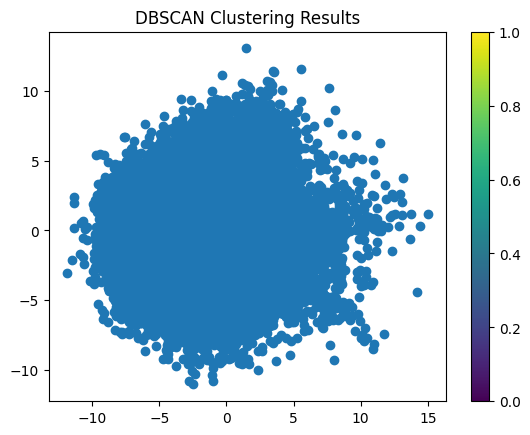

In [10]:
# Reduce to 2D for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(all_vectors)

import matplotlib.pyplot as plt
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], cmap='viridis')
plt.title('DBSCAN Clustering Results')
plt.colorbar()
plt.show()